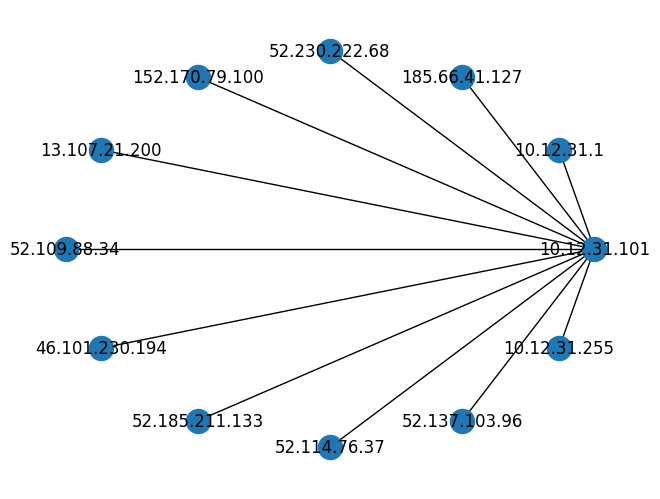

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 

# wireshark_url = "C:\\Users\\bekho\\OneDrive\\Desktop\\UC Fall Semester 2022\\Scripting Language\\it3038c-scripts\\Final project\\data2.csv"
wireshark_url = "data2.csv"
wireshark_data = pd.read_csv(wireshark_url)

sources = wireshark_data.groupby("Source").Source.count()
sources.sort_values()
destinations = wireshark_data.groupby("Destination").Source.count()
destinations.sort_values()
protocols = wireshark_data.groupby("Protocol").Source.count()
protocols.sort_values()

network = nx.from_pandas_edgelist(wireshark_data, source='Source' , target='Destination', edge_key='protocol')

nx.draw_circular(network, with_labels = True)


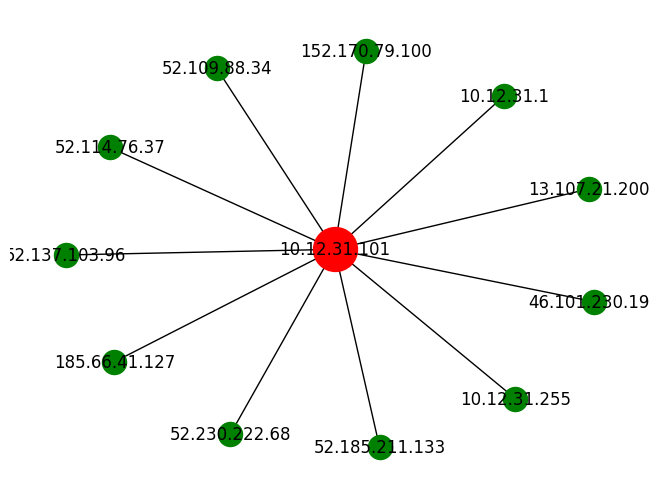

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.12.31.101,10.12.31.1,DNS,74,Standard query 0x4c79 A haciaelsup.com
2,3,0.229626,10.12.31.101,185.66.41.127,TCP,66,59487 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
4,5,0.403039,10.12.31.101,185.66.41.127,TCP,54,59487 > 80 [ACK] Seq=1 Ack=1 Win=262144 Len=0
5,6,0.403559,10.12.31.101,185.66.41.127,HTTP,137,GET /wp-includes/fhPe00/ HTTP/1.1
8,9,0.586235,10.12.31.101,185.66.41.127,TCP,66,[TCP Dup ACK 5#1] 59487 > 80 [ACK] Seq=84 Ac...
...,...,...,...,...,...,...,...
3305,3306,488.596952,10.12.31.101,52.230.222.68,TLSv1.2,153,Application Data
3307,3308,488.798782,10.12.31.101,52.230.222.68,TCP,54,59488 > 443 [ACK] Seq=2349 Ack=4666 Win=2624...
3308,3309,546.711597,10.12.31.101,10.12.31.255,NBNS,92,Name query NB DESKTOP-USER1PC<1c>
3309,3310,547.685465,10.12.31.101,10.12.31.255,NBNS,92,Name query NB DESKTOP-USER1PC<1c>


In [3]:
suspect = "10.12.31.101"
pos = nx.spring_layout(network)
nx.draw(network, pos, node_color= "green",
    node_size = 300, with_labels = True)
options = {"node_size": 1000, "node_color":"r"}
nx.draw_networkx_nodes(network, pos, nodelist=[suspect], **options)

plt.show()

wireshark_data.loc[wireshark_data['Source'] == suspect]
